In [1]:
import librosa as lr
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
audio = []

for filename in os.listdir('../sample_audio'):
    print(filename)
    filename, sr = lr.load(f'../sample_audio/{filename}')
    counter += 1
    audio.append(filename)

Agnew, Roy, Australian Forest Pieces, 4dRd_HTq6ok.wav
Aguirre, Julián, Gato, w9CjQXt12YA.wav
Aitken, George, Sérénade, Op.17, 1e3XI4ubM98.wav
Alain, Albert, Espagnolerie, ts4pTlWdmMg.wav
Albéniz, Isaac, Barcarola, Op.23, dJ3qmtEcQoA.wav
Alder, Ernest, Valse-caprice, sQ7wZLqvPCs.wav
Alden, Bob, The American Dancers, rsmDH2Zopt0.wav
Ajith, Sriram, Winter Night, Op.1, q5xi-3xarzY.wav
Alburger, Mark, The Twelve Fingers, Op.8, ZUmCV1zUuBw.wav
Akimenko, Theodore, Jeux, Op.34, oT9uPpgqty4.wav


In [22]:
audio[2].shape

(2635072,)

In [6]:
FRAME_SIZE = 2048
HOP_SIZE = 342

In [23]:
transformed_audio = []

for song in audio:
    stft = lr.stft(song, n_fft = FRAME_SIZE-1, hop_length = HOP_SIZE)
    stft = np.abs(stft) ** 2
    transformed_audio.append(stft)

In [25]:
transformed_audio[8].shape

(1024, 7939)

In [9]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    lr.display.specshow(Y, 
                        sr=sr,
                       hop_length = hop_length,
                       x_axis='time',
                       y_axis=y_axis)
    plt.colorbar(format="%+2.f")

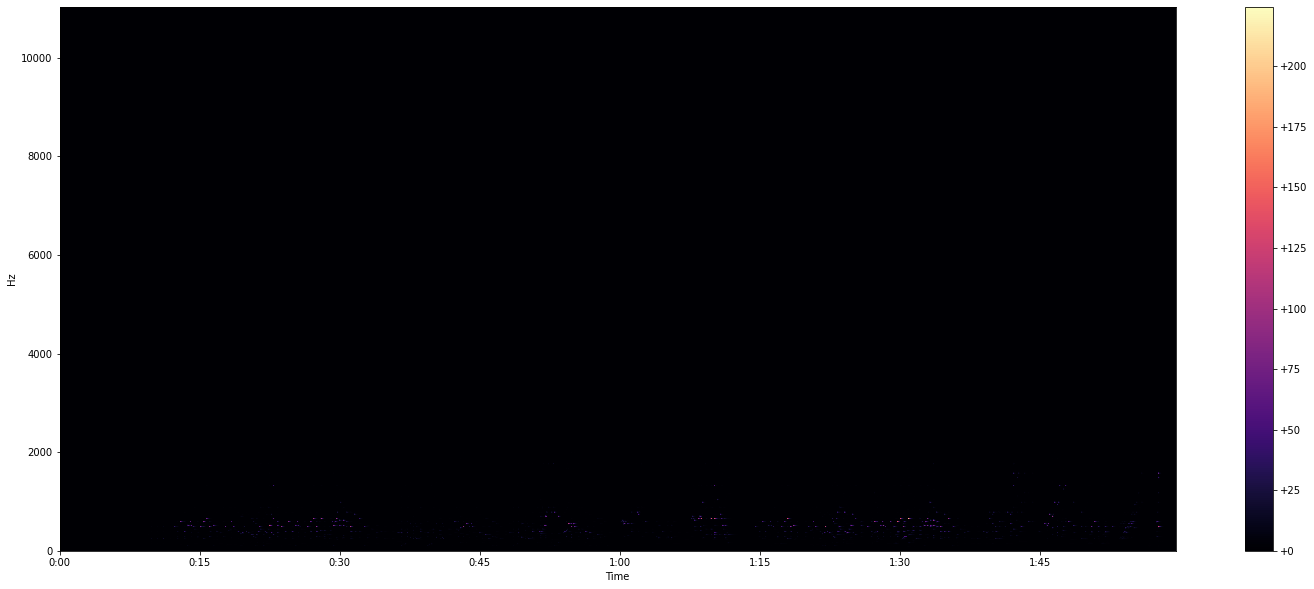

In [10]:
plot_spectrogram(transformed_audio[2],sr ,HOP_SIZE )

In [11]:
transformed_log_audio = []
for stft in transformed_audio:
    log_stft = lr.power_to_db(stft)
    transformed_log_audio.append(log_stft)

In [26]:
transformed_log_audio[2].shape

(1025, 7705)

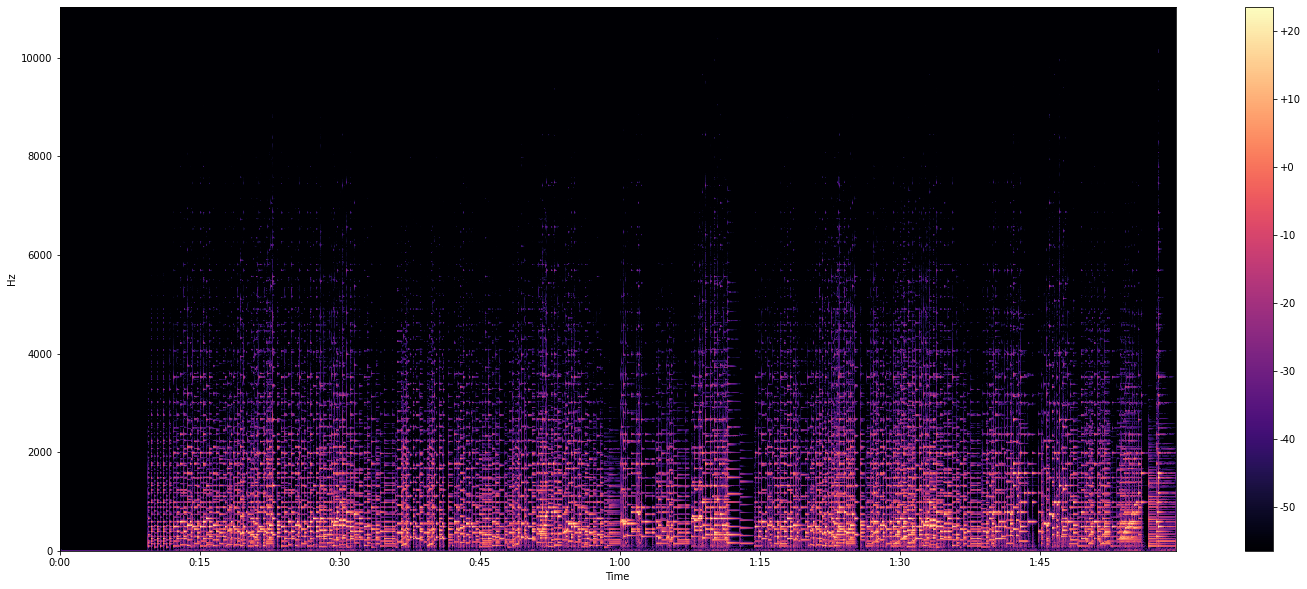

In [14]:
plot_spectrogram(transformed_log_audio[2], sr ,HOP_SIZE, y_axis ='linear' )

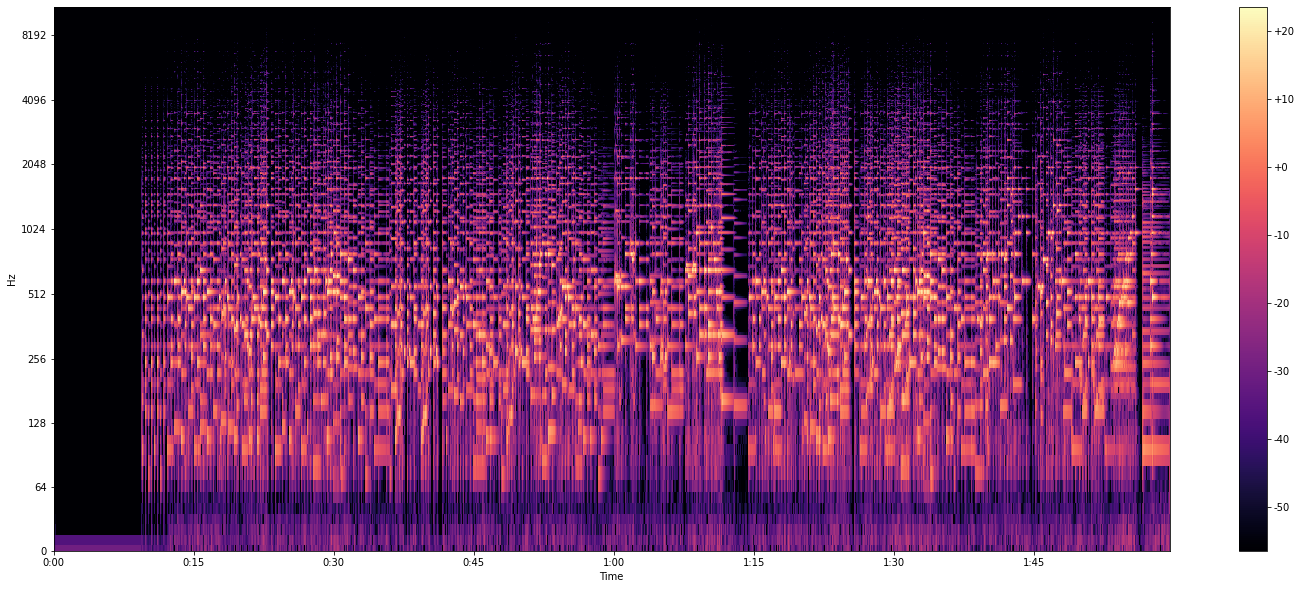

In [15]:
plot_spectrogram(transformed_log_audio[2], sr ,HOP_SIZE, y_axis ='log' )

In [27]:
counter = 1
for npy in transformed_log_audio:
    np.save(f'../npy_files/npy_file_no{counter}', npy)
    counter += 1